In [72]:
# import neccessaries libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score

In [73]:
# load petal data
data = datasets.load_iris()
dir(data)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [74]:
# load into Dataframe 
df = pd.DataFrame(data.data,columns = data.feature_names)
print(df.shape)
df.head()

(150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [75]:
df1 = df.drop(['sepal length (cm)', 'sepal width (cm)'],axis = 'columns')
df1.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


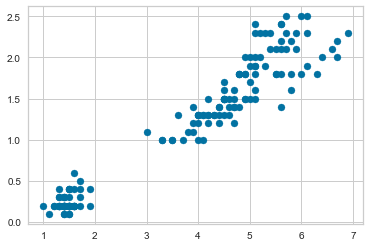

In [76]:
# plot scatter plot
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'])

In [77]:
#ref1. https://medium.com/@cmukesh8688/silhouette-analysis-in-k-means-clustering-cefa9a7ad111

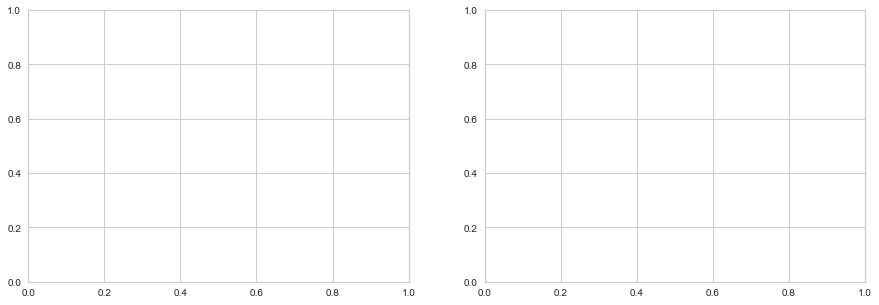

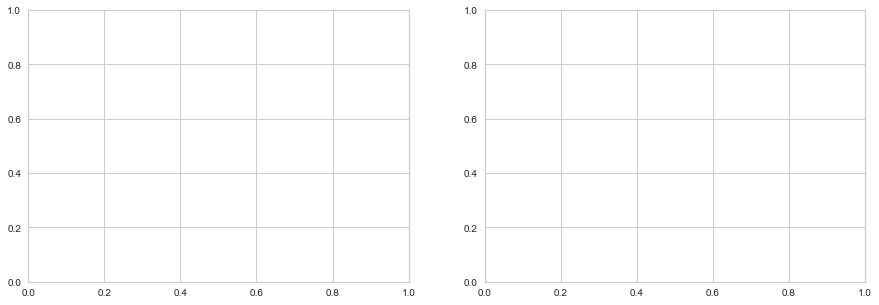

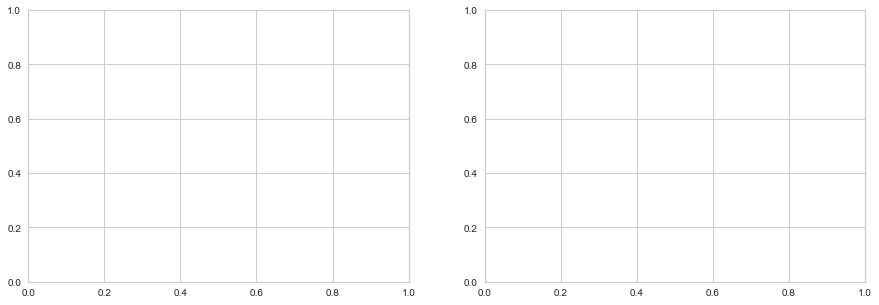

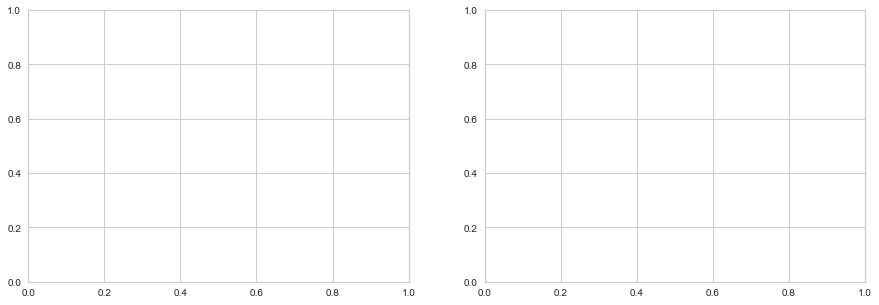

In [78]:
# Now check silhouette coefficient
for i,k in enumerate([2,3,4,5]):
    
    fig, ax = plt.subplots(1,2,figsize=(15,5))
    
    # Run the kmeans algorithm
    km = KMeans(n_clusters=k)
    y_predict = km.fit_predict(df1)
    centroids  = km.cluster_centers_

In [79]:
# get silhouette
silhouette_vals = silhouette_samples(df1,y_predict)
silhouette_vals

array([0.93389575, 0.93389575, 0.91799461, 0.93138016, 0.93389575,
       0.85591542, 0.92654396, 0.93138016, 0.93389575, 0.9131813 ,
       0.93138016, 0.9107136 , 0.91586781, 0.85941622, 0.89334196,
       0.90282729, 0.89283388, 0.92654396, 0.87263947, 0.92376248,
       0.87555265, 0.90282729, 0.83841346, 0.82801856, 0.78405513,
       0.9107136 , 0.88561466, 0.93138016, 0.93389575, 0.9107136 ,
       0.9107136 , 0.90282729, 0.9131813 , 0.93389575, 0.93138016,
       0.89334196, 0.91799461, 0.91586781, 0.91799461, 0.93138016,
       0.91260766, 0.91260766, 0.91799461, 0.8180907 , 0.76560888,
       0.92654396, 0.9107136 , 0.93389575, 0.93138016, 0.93389575,
       0.68318172, 0.62992164, 0.55372997, 0.52896753, 0.68507258,
       0.51152273, 0.66275717, 0.56977116, 0.59017369, 0.50303985,
       0.61644114, 0.05569018, 0.53902196, 0.68318172, 0.5931403 ,
       0.45492351, 0.62992164, 0.44068076, 0.62992164, 0.62289282,
       0.41273037, 0.52896753, 0.55372997, 0.54352682, 0.12037

In [80]:
# silhouette plot
y_ticks = []
y_lower = y_upper = 0
for i,cluster in enumerate(np.unique(y_predict)):
   cluster_silhouette_vals = silhouette_vals[y_predict ==cluster]
   cluster_silhouette_vals.sort()
   y_upper += len(cluster_silhouette_vals)
   
   ax[0].barh(range(y_lower,y_upper), cluster_silhouette_vals,height =1);
   ax[0].text(-0.03,(y_lower+y_upper)/2,str(i+1))
   y_lower += len(cluster_silhouette_vals)
       
   # Get the average silhouette score 
   avg_score = np.mean(silhouette_vals)
   ax[0].axvline(avg_score,linestyle ='--',linewidth =2,color = 'green')
   ax[0].set_yticks([])
   ax[0].set_xlim([-0.1, 1])
   ax[0].set_xlabel('Silhouette coefficient values')
   ax[0].set_ylabel('Cluster labels')
   ax[0].set_title('Silhouette plot for the various clusters')
    
   #scatter plot of data colored with labels
   ax[1].scatter(df1['petal length (cm)'], df1['petal width (cm)'], c = y_predict)
   ax[1].scatter(centroids[:,0],centroids[:,1],marker = '*' , c= 'r',s =250)
   ax[1].set_xlabel('Eruption time in mins')
   ax[1].set_ylabel('Waiting time to next eruption')
   ax[1].set_title('Visualization of clustered data', y=1.02)
    
   plt.tight_layout()
   plt.suptitle(f' Silhouette analysis using k = {k}',fontsize=16,fontweight = 'semibold')
   plt.savefig(f'Silhouette_analysis_{k}.jpg')

<Figure size 432x288 with 0 Axes>

In [81]:
## Dunn Index
# https://douglasrizzo.com.br/dunn-index/

In [82]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

DIAMETER_METHODS = ['mean_cluster', 'farthest']
CLUSTER_DISTANCE_METHODS = ['nearest', 'farthest']


def inter_cluster_distances(labels, distances, method='nearest'):
    """Calculates the distances between the two nearest points of each cluster.

    :param labels: a list containing cluster labels for each of the n elements
    :param distances: an n x n numpy.array containing the pairwise distances between elements
    :param method: `nearest` for the distances between the two nearest points in each cluster, or `farthest`
    """
    if method not in CLUSTER_DISTANCE_METHODS:
        raise ValueError(
            'method must be one of {}'.format(CLUSTER_DISTANCE_METHODS))

    if method == 'nearest':
        return __cluster_distances_by_points(labels, distances)
    elif method == 'farthest':
        return __cluster_distances_by_points(labels, distances, farthest=True)


def __cluster_distances_by_points(labels, distances, farthest=False):
    n_unique_labels = len(np.unique(labels))
    cluster_distances = np.full((n_unique_labels, n_unique_labels),
                                float('inf') if not farthest else 0)

    np.fill_diagonal(cluster_distances, 0)

    for i in np.arange(0, len(labels) - 1):
        for ii in np.arange(i, len(labels)):
            if labels[i] != labels[ii] and (
                (not farthest and
                 distances[i, ii] < cluster_distances[labels[i], labels[ii]])
                    or
                (farthest and
                 distances[i, ii] > cluster_distances[labels[i], labels[ii]])):
                cluster_distances[labels[i], labels[ii]] = cluster_distances[
                    labels[ii], labels[i]] = distances[i, ii]
    return cluster_distances


def diameter(labels, distances, method='farthest'):
    """Calculates cluster diameters

    :param labels: a list containing cluster labels for each of the n elements
    :param distances: an n x n numpy.array containing the pairwise distances between elements
    :param method: either `mean_cluster` for the mean distance between all elements in each cluster, or `farthest` for the distance between the two points furthest from each other
    """
    if method not in DIAMETER_METHODS:
        raise ValueError('method must be one of {}'.format(DIAMETER_METHODS))

    n_clusters = len(np.unique(labels))
    diameters = np.zeros(n_clusters)

    if method == 'mean_cluster':
        for i in range(0, len(labels) - 1):
            for ii in range(i + 1, len(labels)):
                if labels[i] == labels[ii]:
                    diameters[labels[i]] += distances[i, ii]

        for i in range(len(diameters)):
            diameters[i] /= sum(labels == i)

    elif method == 'farthest':
        for i in range(0, len(labels) - 1):
            for ii in range(i + 1, len(labels)):
                if labels[i] == labels[ii] and distances[i, ii] > diameters[
                        labels[i]]:
                    diameters[labels[i]] = distances[i, ii]
    return diameters


def dunn(labels, distances, diameter_method='farthest',
         cdist_method='nearest'):
    """
    Dunn index for cluster validation (larger is better).
    
    .. math:: D = \\min_{i = 1 \\ldots n_c; j = i + 1\ldots n_c} \\left\\lbrace \\frac{d \\left( c_i,c_j \\right)}{\\max_{k = 1 \\ldots n_c} \\left(diam \\left(c_k \\right) \\right)} \\right\\rbrace
    
    where :math:`d(c_i,c_j)` represents the distance between
    clusters :math:`c_i` and :math:`c_j`, and :math:`diam(c_k)` is the diameter of cluster :math:`c_k`.

    Inter-cluster distance can be defined in many ways, such as the distance between cluster centroids or between their closest elements. Cluster diameter can be defined as the mean distance between all elements in the cluster, between all elements to the cluster centroid, or as the distance between the two furthest elements.

    The higher the value of the resulting Dunn index, the better the clustering
    result is considered, since higher values indicate that clusters are
    compact (small :math:`diam(c_k)`) and far apart (large :math:`d \\left( c_i,c_j \\right)`).

    :param labels: a list containing cluster labels for each of the n elements
    :param distances: an n x n numpy.array containing the pairwise distances between elements
    :param diameter_method: see :py:function:`diameter` `method` parameter
    :param cdist_method: see :py:function:`diameter` `method` parameter
    
    .. [Kovacs2005] Kovács, F., Legány, C., & Babos, A. (2005). Cluster validity measurement techniques. 6th International Symposium of Hungarian Researchers on Computational Intelligence.
    """

    labels = LabelEncoder().fit(labels).transform(labels)

    ic_distances = inter_cluster_distances(labels, distances, cdist_method)
    min_distance = min(ic_distances[ic_distances.nonzero()])
    max_diameter = max(diameter(labels, distances, diameter_method))

    return min_distance / max_diameter

In [83]:
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

data = load_iris()
kmeans = KMeans(n_clusters=3)
c = data['target']
x = data['data']
k = kmeans.fit_predict(x)
d = euclidean_distances(x)

In [99]:
#Se for o exercício slide 33 de Agrupamento de Dados e suas Aplicações VII usar esses dados ao invés da iris
data = np.array([
    [1.0,2.0],
    [2.0,1.0],
    [1.0,1.0],
    [2.0,2.0],
    [8.0,9.0],
    [9.0,8.0],
    [9.0,9.0],
    [8.0,8.0],
    [1.0,15.0],
    [2.0,15.0],
    [1.0,14.0],
    [2.0,14.0]
])
target = np.array([
    [1],
    [1],
    [1],
    [1],
    [0],
    [0],
    [0],
    [0],
    [2],
    [2],
    [2],
    [2]
])

In [100]:
x = data
c = target
k = kmeans.fit_predict(x)
d = euclidean_distances(x)

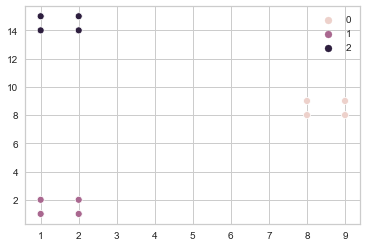

In [101]:
import seaborn as sns
sns.scatterplot(x[:,0],x[:,1],hue=k)

In [102]:
dund = dunn(c, d,  'farthest', 'nearest')
print('Indice Dunn da aula', dund)

Indice Dunn da aula 5.52268050859363


C:\Users\cazev\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [103]:
for diameter_method in DIAMETER_METHODS:
    for cdist_method in CLUSTER_DISTANCE_METHODS:
        dund = dunn(c, d, diameter_method, cdist_method)
        dunk = dunn(k, d, diameter_method, cdist_method)
        print(diameter_method, cdist_method, dund, dunk)

mean_cluster nearest 4.575138334626048 4.575138334626048
mean_cluster farthest 5.85786437626905 5.85786437626905
farthest nearest 5.52268050859363 5.52268050859363
farthest farthest 7.071067811865475 7.071067811865475


In [104]:
# DB index 
#ref. https://www.geeksforgeeks.org/dunn-index-and-db-index-cluster-validity-indices-set-1/

In [105]:
from sklearn import datasets 
from sklearn.cluster import KMeans 
from sklearn.metrics import davies_bouldin_score 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.metrics import silhouette_samples,silhouette_score

# loading the dataset 
X, y_true = make_blobs(n_samples=300, centers=4,cluster_std=0.50, random_state=0)

In [106]:
# K-Means 
#kmeans = KMeans(n_clusters=4, random_state=1).fit(X)

# Parametros para o exercício de sala de aula
X = data
y_true = target
kmeans = KMeans(n_clusters=3, random_state=1).fit(X) # exercício de sala de aula
# Parametros para o exercício de sala de aula, interessante testar os indicadores alternando o valor dos clusters (k) 
#e observando que os indicadores mudam, por exemplo silhueta para k = 3 (ideal) é maior que k=2, 4, 5

# we store the cluster labels 
labels = kmeans.labels_ 
print(davies_bouldin_score(X, labels)) 

0.14988104613203035


In [107]:
# Calculate Silhoutte Score
# ref. https://dzone.com/articles/kmeans-silhouette-score-explained-with-python-exam
# ref. https://towardsdatascience.com/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c
score = silhouette_score(X, labels, metric='euclidean')
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.879


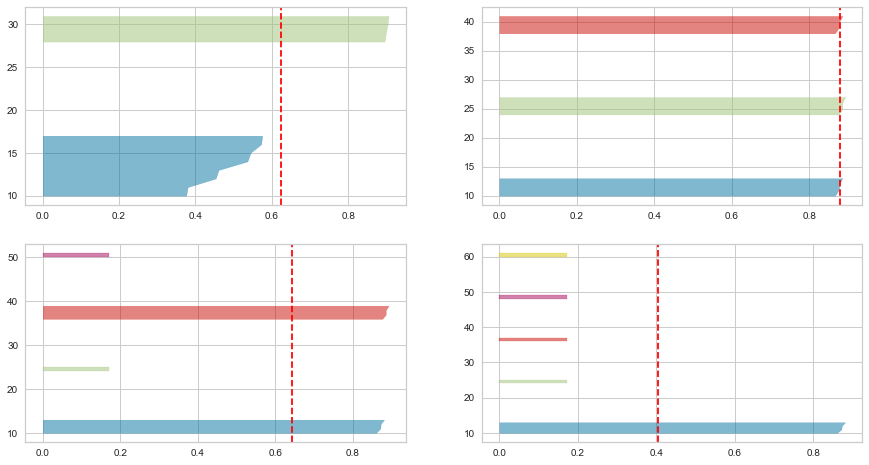

In [97]:
#ref. https://dzone.com/articles/kmeans-silhouette-score-explained-with-python-exam
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

In [1]:
# Validação Indireta
# Estatística ? de Hubert Normalizada
# Slide 20, exercício 26

In [2]:
import numpy as np

cm = np.array([[0, 0, 0, 0], [2, 0, 0, 0], [7, 7, 0, 0], [7, 7, 4, 0]])
ucm = np.sum(cm) / np.count_nonzero(cm)
d = np.array([[0, 0, 0, 0], [2, 0, 0, 0], [9, 7, 0, 0], [15, 12, 4, 0]])
ud = np.sum(d) / np.count_nonzero(d)

N = d.shape[0]
M = N * (N - 1) / 2

num_sum = 0
den_x_sum = 0
den_y_sum = 0
for i in range(d.shape[0] - 1):
    for j in range(i + 1, d.shape[0]):
        num_sum += cm[j, i] * d[j, i]
        den_x_sum += cm[j, i] ** 2
        den_y_sum += d[j, i] ** 2

num = num_sum / M - ucm * ud
den = ((den_x_sum / M - ucm ** 2) ** 0.5) * ((den_y_sum / M - ud ** 2) ** 0.5)

hubert = num / den

print(hubert)

0.82293316508058
